In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

plt.rcParams.update({'font.family':'arial'})

%matplotlib inline

# ABE16

In [2]:
df_c = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [3]:
df_allele2 = df_c[['A4','A5','A7']]
df_allele2['probability'] = df_allele2['A4'] * df_allele2['A5'] * df_allele2['A7']
df_allele2.to_csv('Data/calc_freq/ABEmax_ABE16_A4_A5_A7.csv',index=False)

df_allele2_err = df_c_sem[['A4','A5','A7']]
df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A4']/df_allele2['A4']) +
                                        np.square(df_allele2_err['A5']/df_allele2['A5']) +
                                        np.square(df_allele2_err['A7']/df_allele2['A7'])) * df_allele2['probability']
df_allele2_err.to_csv('Data/calc_freq/ABEmax_ABE16_A4_A5_A7_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/1103183644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2['probability'] = df_allele2['A4'] * df_allele2['A5'] * df_allele2['A7']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/1103183644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A4']/df_allele2['A4']) +


In [4]:
df_allele4 = df_c[['A5','A7','A8']]
df_allele4['probability'] = df_allele4['A5'] * df_allele4['A7'] * df_allele4['A8']
df_allele4.to_csv('Data/calc_freq/ABEmax_ABE16_A5_A7_A8.csv',index=False)

df_allele4_err = df_c_sem[['A5','A7','A8']]
df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A5']/df_allele4['A5']) +
                                        np.square(df_allele4_err['A7']/df_allele4['A7']) +
                                        np.square(df_allele4_err['A8']/df_allele4['A8'])) * df_allele4['probability']
df_allele4_err.to_csv('Data/calc_freq/ABEmax_ABE16_A5_A7_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/2675213142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4['probability'] = df_allele4['A5'] * df_allele4['A7'] * df_allele4['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/2675213142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A5']/df_allele4['A5']) +


In [5]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABEmax_ABE16_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGGAATAAATCATAGAATCC,0.919947,0.924404,0.902886,0.861335,0.806898,0.774293,0.710869
GGGAGTGAATCATAGAATCC,0.005525,0.004219,0.008893,0.013371,0.043470,0.077748,0.138791
GGGAGTAAATCATAGAATCC,0.015151,0.017759,0.033004,0.064163,0.081831,0.070146,0.041986
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.002714,0.008501,0.032248
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.001083,0.002492,0.003630,0.005228


In [6]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABEmax_ABE16_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGGAATAAATCATAGAATCC,0.006600,0.000595,0.006292,0.000194,0.008426,0.008183,0.004522
GGGAGTGAATCATAGAATCC,0.001233,0.000640,0.001280,0.000532,0.002265,0.004010,0.003277
GGGAGTAAATCATAGAATCC,0.001102,0.000065,0.001725,0.000805,0.004362,0.002400,0.001099
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000426,0.000312,0.000260
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000385,0.000170,0.000054


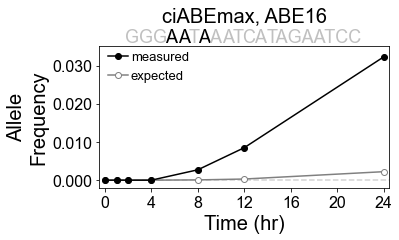

In [7]:
# allele 2: GGGGGTGAATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele2['probability'],yerr=df_allele2_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGAATCATAGAATCC'],yerr=df_a_err.loc['GGGGGTGAATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.002,0.035])
ax.set_yticks([0,0.01,0.02,0.03])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.035, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.035, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.035, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.035, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.035, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.035, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.035, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.035, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.035, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.035, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_ABE16_allele2_20220405.svg',dpi=300,bbox_inches='tight')

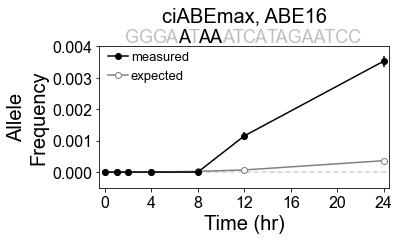

In [8]:
# allele 4: GGGAGTGGATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele4['probability'],yerr=df_allele4_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGAGTGGATCATAGAATCC'],yerr=df_a_err.loc['GGGAGTGGATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.0005,0.004])
ax.set_yticks([0,0.001,0.002,0.003,0.004])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.004, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.004, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.8, 0.004, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.004, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.004, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.004, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.6, 0.004, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.004, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.004, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.004, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_ABE16_allele4_20220405.svg',dpi=300,bbox_inches='tight')

# HEK2

In [9]:
df_c = pd.read_csv('Data/cumulative/ABEmax_HEK2_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABEmax_HEK2_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [10]:
df_allele1 = df_c[['A5','A7']]
df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
df_allele1.to_csv('Data/calc_freq/ABEmax_HEK2_A5_A7.csv',index=False)

df_allele1_err = df_c_sem[['A5','A7']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +
                                        np.square(df_allele1_err['A7']/df_allele1['A7'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABEmax_HEK2_A5_A7_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/4119133298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/4119133298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +


In [11]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABEmax_HEK2_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAACACAAAGCATAGACTGC,0.911701,0.903631,0.876650,0.861581,0.808296,0.763560,0.685367
GAACGCAAAGCATAGACTGC,0.024882,0.032173,0.047307,0.065597,0.113718,0.145455,0.186898
GAACGCGAAGCATAGACTGC,0.001665,0.001786,0.002046,0.003116,0.010662,0.019409,0.039302
GAACACGAAGCATAGACTGC,0.002341,0.002242,0.002624,0.002349,0.001965,0.002186,0.002309
GAACACAAGGCATAGACTGC,0.002237,0.002050,0.002619,0.002126,0.001759,0.001979,0.001932


In [12]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABEmax_HEK2_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAACACAAAGCATAGACTGC,0.000899,0.000525,0.001310,0.003003,0.008772,0.005223,0.006874
GAACGCAAAGCATAGACTGC,0.000079,0.001615,0.001399,0.002616,0.007884,0.003401,0.006199
GAACGCGAAGCATAGACTGC,0.000157,0.000229,0.000151,0.000303,0.000325,0.000496,0.001595
GAACACGAAGCATAGACTGC,0.000042,0.000111,0.000130,0.000147,0.000033,0.000047,0.000122
GAACACAAGGCATAGACTGC,0.000126,0.000011,0.000164,0.000036,0.000240,0.000110,0.000139


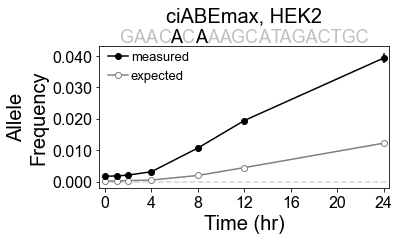

In [13]:
# allele 1: GAACGCGAAGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAACGCGAAGCATAGACTGC'],yerr=df_a_err.loc['GAACGCGAAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.002,0.043])
ax.set_yticks([0,0.01,0.02,0.03,0.04])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.043, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.043, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.043, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.043, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.043, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.043, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.043, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.3, 0.043, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.043, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.043, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.043, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_HEK2_allele1_20220405.svg',dpi=300,bbox_inches='tight')

# HEK3

In [14]:
df_c = pd.read_csv('Data/cumulative/ABEmax_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABEmax_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [15]:
df_allele1 = df_c[['A6','A8']]
df_allele1['probability'] = df_allele1['A6'] * df_allele1['A8']
df_allele1.to_csv('Data/calc_freq/ABEmax_HEK3_A6_A8.csv',index=False)

df_allele1_err = df_c_sem[['A6','A8']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A6']/df_allele1['A6']) +
                                        np.square(df_allele1_err['A8']/df_allele1['A8'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABEmax_HEK3_A6_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/3311343993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A6'] * df_allele1['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15721/3311343993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A6']/df_allele1['A6']) +


In [16]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABEmax_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.919725,0.919352,0.914118,0.920922,0.913693,0.906329,0.879283
GGCCCGGACTGAGCACGTGA,0.011205,0.010066,0.012191,0.011866,0.020792,0.026579,0.043623
GGCCCGGGCTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004324
GGCCCAGGCTGAGCACGTGA,0.002782,0.004117,0.002916,0.001877,0.002538,0.002275,0.005009
GGCCCAGACTGGGCACGTGA,0.002797,0.004073,0.003547,0.003366,0.003297,0.002357,0.003350


In [17]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABEmax_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.003494,0.003342,0.001443,0.001677,0.001972,0.002618,0.000161
GGCCCGGACTGAGCACGTGA,0.000432,0.000940,0.000588,0.000343,0.000974,0.001350,0.000427
GGCCCGGGCTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000214
GGCCCAGGCTGAGCACGTGA,0.000777,0.000737,0.000466,0.000042,0.000546,0.000179,0.000432
GGCCCAGACTGGGCACGTGA,0.000412,0.000421,0.000556,0.000024,0.000164,0.000480,0.000063


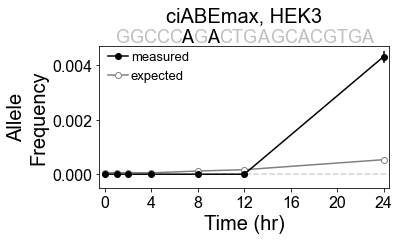

In [18]:
# allele 1: GGCCCGGGCTGAGCACGTGA
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCCCGGGCTGAGCACGTGA'],yerr=df_a_err.loc['GGCCCGGGCTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.0005,0.0047])
ax.set_yticks([0,0.002,0.004])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.8, 0.0047, 'GGCCC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.1, 0.0047, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.3, 0.0047, 'G', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.35, 0.0047, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(11.5, 0.0047, 'CTG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.65, 0.0047, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.7, 0.0047, 'GCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_HEK3_allele1_20220405.svg',dpi=300,bbox_inches='tight')